## 케라스 기초 예제 돌려보기(MNIST)

In [30]:
# 케라스 기초 예제 돌려보기(MNIST)
import keras
from keras.datasets import mnist
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices()) # 현재 컴퓨터에서 사용 가능한 자원 출력. GPU를 사용하려면 CUDA와 cuDNN이 설치되어야 함 

(train_images, train_labels), (test_images, test_labels) = mnist.load_data() # mnist.load_data()는 4개의 아웃풋을 제공. 

train_images.shape 
print(len(train_labels), train_images.shape[0])


[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 15855152774177576835
]


60000 60000


[5 0 4 ... 5 6 8]


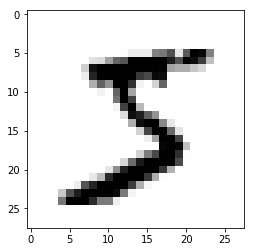

In [20]:
# MNIST train data 한장 출력해보기
import matplotlib.pyplot as plt

digit = train_images[0]
print(train_labels)
plt.imshow(digit, cmap=plt.cm.binary) # 'digit라는 matrix를 넣어 binary 이미지를 출력하겠다.'
plt.show()


In [21]:
# Keras로 간단한 이미지 분류 모델 만들기
from keras import models
from keras import layers

network = models.Sequential()
network.add(layers.Dense(512, activation='relu', input_shape=(28*28,))) # Dense : Dense는 Keras에서 fully-connected layer를 의미.
network.add(layers.Dense(10, activation='softmax')) # 뉴런 10개를 붙이고 softmax로 활성화

network.compile(optimizer='rmsprop',
                loss = 'categorical_crossentropy', # crossentropy는 확률분포를 서로 갖게 만든다는 개념. 
                metrics=['accuracy'])

# 학습 데이터 전처리
# error을 weight로 미분한 후 learning rate와 곱한 만큼 역전파를 하는데, 이때 고르게 에러를 갱신하려면 0~1 범위로 정규화해주어야 한다. 
train_images = train_images.reshape((60000, 28*28)) 
train_images = train_images.astype('float32') / 255 # 256으로 나눔.
test_images = test_images.reshape((10000, 28*28)) 
test_images = test_images.astype('float32') / 255 # 256으로 나눔.

In [22]:
from keras.utils import to_categorical

# 범주형 데이터로 변환
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)
print(train_labels.shape)

(60000, 10)


In [28]:
network.fit(train_images, train_labels, epochs=10, batch_size=128)

Epoch 1/10
  128/60000 [..............................] - ETA: 4s - loss: 0.0161 - acc: 0.9922

 1024/60000 [..............................] - ETA: 3s - loss: 0.0196 - acc: 0.9941

 1920/60000 [..............................] - ETA: 3s - loss: 0.0245 - acc: 0.9932

 3072/60000 [>.............................] - ETA: 3s - loss: 0.0214 - acc: 0.9941

 4096/60000 [=>............................] - ETA: 3s - loss: 0.0205 - acc: 0.9946

 5120/60000 [=>............................] - ETA: 3s - loss: 0.0204 - acc: 0.9941

 5760/60000 [=>............................] - ETA: 3s - loss: 0.0223 - acc: 0.9931

 6400/60000 [==>...........................] - ETA: 3s - loss: 0.0218 - acc: 0.9933

 7296/60000 [==>...........................] - ETA: 3s - loss: 0.0213 - acc: 0.9936

 8320/60000 [===>..........................] - ETA: 3s - loss: 0.0222 - acc: 0.9931

 9472/60000 [===>..........................] - ETA: 2s - loss: 0.0219 - acc: 0.9932

10624/60000 [====>.........................] - ETA: 2s - loss: 0.0227 - acc: 0.9929

11776/60000 [====>.........................] - ETA: 2s - loss: 0.0226 - acc: 0.9925

12928/60000 [=====>........................] - ETA: 2s - loss: 0.0258 - acc: 0.9921

14080/60000 [======>.......................] - ETA: 2s - loss: 0.0261 - acc: 0.9920

15232/60000 [======>.......................] - ETA: 2s - loss: 0.0262 - acc: 0.9916

16256/60000 [=======>......................] - ETA: 2s - loss: 0.0271 - acc: 0.9912

17280/60000 [=======>......................] - ETA: 2s - loss: 0.0270 - acc: 0.9913

18304/60000 [========>.....................] - ETA: 2s - loss: 0.0267 - acc: 0.9914

19200/60000 [========>.....................] - ETA: 2s - loss: 0.0264 - acc: 0.9916

20224/60000 [=========>....................] - ETA: 2s - loss: 0.0260 - acc: 0.9917

21376/60000 [=========>....................] - ETA: 2s - loss: 0.0257 - acc: 0.9919

22400/60000 [==========>...................] - ETA: 2s - loss: 0.0260 - acc: 0.9918

23424/60000 [==========>...................] - ETA: 1s - loss: 0.0266 - acc: 0.9918

24576/60000 [===========>..................] - ETA: 1s - loss: 0.0264 - acc: 0.9919

25728/60000 [===========>..................] - ETA: 1s - loss: 0.0267 - acc: 0.9919

26752/60000 [============>.................] - ETA: 1s - loss: 0.0267 - acc: 0.9919

27776/60000 [============>.................] - ETA: 1s - loss: 0.0264 - acc: 0.9919

28672/60000 [=============>................] - ETA: 1s - loss: 0.0266 - acc: 0.9918

29824/60000 [=============>................] - ETA: 1s - loss: 0.0267 - acc: 0.9916

30976/60000 [==============>...............] - ETA: 1s - loss: 0.0265 - acc: 0.9917

32000/60000 [===============>..............] - ETA: 1s - loss: 0.0262 - acc: 0.9919

33024/60000 [===============>..............] - ETA: 1s - loss: 0.0260 - acc: 0.9920

34048/60000 [================>.............] - ETA: 1s - loss: 0.0258 - acc: 0.9920

35200/60000 [================>.............] - ETA: 1s - loss: 0.0258 - acc: 0.9919

36224/60000 [=================>............] - ETA: 1s - loss: 0.0266 - acc: 0.9917

37120/60000 [=================>............] - ETA: 1s - loss: 0.0266 - acc: 0.9917

38144/60000 [==================>...........] - ETA: 1s - loss: 0.0267 - acc: 0.9917

39168/60000 [==================>...........] - ETA: 1s - loss: 0.0265 - acc: 0.9917

40320/60000 [===================>..........] - ETA: 1s - loss: 0.0263 - acc: 0.9918

41344/60000 [===================>..........] - ETA: 0s - loss: 0.0260 - acc: 0.9919

42368/60000 [====================>.........] - ETA: 0s - loss: 0.0265 - acc: 0.9918

43264/60000 [====================>.........] - ETA: 0s - loss: 0.0266 - acc: 0.9917

44288/60000 [=====================>........] - ETA: 0s - loss: 0.0267 - acc: 0.9917

45440/60000 [=====================>........] - ETA: 0s - loss: 0.0271 - acc: 0.9915

46464/60000 [======================>.......] - ETA: 0s - loss: 0.0271 - acc: 0.9916

47616/60000 [======================>.......] - ETA: 0s - loss: 0.0273 - acc: 0.9915

48640/60000 [=======================>......] - ETA: 0s - loss: 0.0271 - acc: 0.9915

49664/60000 [=======================>......] - ETA: 0s - loss: 0.0270 - acc: 0.9916

50688/60000 [========================>.....] - ETA: 0s - loss: 0.0271 - acc: 0.9916

51840/60000 [========================>.....] - ETA: 0s - loss: 0.0272 - acc: 0.9915

52992/60000 [=========================>....] - ETA: 0s - loss: 0.0274 - acc: 0.9915

54016/60000 [==========================>...] - ETA: 0s - loss: 0.0275 - acc: 0.9915

55040/60000 [==========================>...] - ETA: 0s - loss: 0.0274 - acc: 0.9916

56192/60000 [===========================>..] - ETA: 0s - loss: 0.0274 - acc: 0.9916

57344/60000 [===========================>..] - ETA: 0s - loss: 0.0276 - acc: 0.9916

58496/60000 [============================>.] - ETA: 0s - loss: 0.0276 - acc: 0.9916

59520/60000 [============================>.] - ETA: 0s - loss: 0.0275 - acc: 0.9916

60000/60000 [==============================] - 3s 51us/step - loss: 0.0275 - acc: 0.9916


Epoch 2/10
  128/60000 [..............................] - ETA: 3s - loss: 0.0092 - acc: 1.0000

  896/60000 [..............................] - ETA: 3s - loss: 0.0154 - acc: 0.9955

 1920/60000 [..............................] - ETA: 3s - loss: 0.0175 - acc: 0.9953

 3072/60000 [>.............................] - ETA: 3s - loss: 0.0171 - acc: 0.9951

 4096/60000 [=>............................] - ETA: 3s - loss: 0.0202 - acc: 0.9937

 5120/60000 [=>............................] - ETA: 2s - loss: 0.0192 - acc: 0.9939

 6272/60000 [==>...........................] - ETA: 2s - loss: 0.0198 - acc: 0.9939

 7296/60000 [==>...........................] - ETA: 2s - loss: 0.0192 - acc: 0.9942

 8064/60000 [===>..........................] - ETA: 2s - loss: 0.0195 - acc: 0.9940

 9088/60000 [===>..........................] - ETA: 2s - loss: 0.0191 - acc: 0.9943

10112/60000 [====>.........................] - ETA: 2s - loss: 0.0184 - acc: 0.9946

11136/60000 [====>.........................] - ETA: 2s - loss: 0.0196 - acc: 0.9943

12160/60000 [=====>........................] - ETA: 2s - loss: 0.0208 - acc: 0.9940

13184/60000 [=====>........................] - ETA: 2s - loss: 0.0208 - acc: 0.9940

14080/60000 [======>.......................] - ETA: 2s - loss: 0.0205 - acc: 0.9940

14976/60000 [======>.......................] - ETA: 2s - loss: 0.0201 - acc: 0.9941

15872/60000 [======>.......................] - ETA: 2s - loss: 0.0201 - acc: 0.9941

16896/60000 [=======>......................] - ETA: 2s - loss: 0.0199 - acc: 0.9941

17920/60000 [=======>......................] - ETA: 2s - loss: 0.0197 - acc: 0.9941

19072/60000 [========>.....................] - ETA: 2s - loss: 0.0195 - acc: 0.9941

20224/60000 [=========>....................] - ETA: 2s - loss: 0.0195 - acc: 0.9942

21248/60000 [=========>....................] - ETA: 2s - loss: 0.0194 - acc: 0.9942

22400/60000 [==========>...................] - ETA: 1s - loss: 0.0197 - acc: 0.9942

23552/60000 [==========>...................] - ETA: 1s - loss: 0.0207 - acc: 0.9938

24704/60000 [===========>..................] - ETA: 1s - loss: 0.0211 - acc: 0.9938

25856/60000 [===========>..................] - ETA: 1s - loss: 0.0211 - acc: 0.9937

26880/60000 [============>.................] - ETA: 1s - loss: 0.0209 - acc: 0.9937

27904/60000 [============>.................] - ETA: 1s - loss: 0.0212 - acc: 0.9935

28928/60000 [=============>................] - ETA: 1s - loss: 0.0219 - acc: 0.9934

30080/60000 [==============>...............] - ETA: 1s - loss: 0.0216 - acc: 0.9935

31232/60000 [==============>...............] - ETA: 1s - loss: 0.0216 - acc: 0.9935

32256/60000 [===============>..............] - ETA: 1s - loss: 0.0220 - acc: 0.9934

33280/60000 [===============>..............] - ETA: 1s - loss: 0.0221 - acc: 0.9933

34432/60000 [================>.............] - ETA: 1s - loss: 0.0220 - acc: 0.9934

35456/60000 [================>.............] - ETA: 1s - loss: 0.0217 - acc: 0.9935

36608/60000 [=================>............] - ETA: 1s - loss: 0.0220 - acc: 0.9934

37760/60000 [=================>............] - ETA: 1s - loss: 0.0221 - acc: 0.9934

39040/60000 [==================>...........] - ETA: 1s - loss: 0.0221 - acc: 0.9933

40320/60000 [===================>..........] - ETA: 0s - loss: 0.0220 - acc: 0.9933

41344/60000 [===================>..........] - ETA: 0s - loss: 0.0219 - acc: 0.9933

42624/60000 [====================>.........] - ETA: 0s - loss: 0.0218 - acc: 0.9933

43776/60000 [====================>.........] - ETA: 0s - loss: 0.0217 - acc: 0.9933

45056/60000 [=====================>........] - ETA: 0s - loss: 0.0218 - acc: 0.9933

46336/60000 [======================>.......] - ETA: 0s - loss: 0.0217 - acc: 0.9934

47616/60000 [======================>.......] - ETA: 0s - loss: 0.0217 - acc: 0.9934

48768/60000 [=======================>......] - ETA: 0s - loss: 0.0217 - acc: 0.9934

50048/60000 [========================>.....] - ETA: 0s - loss: 0.0218 - acc: 0.9933

51328/60000 [========================>.....] - ETA: 0s - loss: 0.0217 - acc: 0.9933

52480/60000 [=========================>....] - ETA: 0s - loss: 0.0216 - acc: 0.9933

53760/60000 [=========================>....] - ETA: 0s - loss: 0.0215 - acc: 0.9933

55040/60000 [==========================>...] - ETA: 0s - loss: 0.0218 - acc: 0.9933

56320/60000 [===========================>..] - ETA: 0s - loss: 0.0216 - acc: 0.9934

57600/60000 [===========================>..] - ETA: 0s - loss: 0.0217 - acc: 0.9933

58880/60000 [============================>.] - ETA: 0s - loss: 0.0219 - acc: 0.9932

60000/60000 [==============================] - 3s 48us/step - loss: 0.0218 - acc: 0.9931


Epoch 3/10
  128/60000 [..............................] - ETA: 3s - loss: 0.0020 - acc: 1.0000

 1024/60000 [..............................] - ETA: 3s - loss: 0.0086 - acc: 0.9971

 2176/60000 [>.............................] - ETA: 3s - loss: 0.0138 - acc: 0.9954

 3456/60000 [>.............................] - ETA: 2s - loss: 0.0145 - acc: 0.9948

 4736/60000 [=>............................] - ETA: 2s - loss: 0.0126 - acc: 0.9960

 6016/60000 [==>...........................] - ETA: 2s - loss: 0.0151 - acc: 0.9957

 7296/60000 [==>...........................] - ETA: 2s - loss: 0.0142 - acc: 0.9960

 8576/60000 [===>..........................] - ETA: 2s - loss: 0.0146 - acc: 0.9957

 9856/60000 [===>..........................] - ETA: 2s - loss: 0.0169 - acc: 0.9949

11136/60000 [====>.........................] - ETA: 2s - loss: 0.0181 - acc: 0.9946

12416/60000 [=====>........................] - ETA: 2s - loss: 0.0176 - acc: 0.9950

13696/60000 [=====>........................] - ETA: 2s - loss: 0.0177 - acc: 0.9950

14976/60000 [======>.......................] - ETA: 1s - loss: 0.0170 - acc: 0.9953

16128/60000 [=======>......................] - ETA: 1s - loss: 0.0164 - acc: 0.9955

17408/60000 [=======>......................] - ETA: 1s - loss: 0.0161 - acc: 0.9956

18688/60000 [========>.....................] - ETA: 1s - loss: 0.0159 - acc: 0.9957

19968/60000 [========>.....................] - ETA: 1s - loss: 0.0163 - acc: 0.9955

20992/60000 [=========>....................] - ETA: 1s - loss: 0.0163 - acc: 0.9955

22272/60000 [==========>...................] - ETA: 1s - loss: 0.0161 - acc: 0.9955

23552/60000 [==========>...................] - ETA: 1s - loss: 0.0157 - acc: 0.9956

24832/60000 [===========>..................] - ETA: 1s - loss: 0.0159 - acc: 0.9957

26112/60000 [============>.................] - ETA: 1s - loss: 0.0161 - acc: 0.9956

27264/60000 [============>.................] - ETA: 1s - loss: 0.0161 - acc: 0.9956

28416/60000 [=============>................] - ETA: 1s - loss: 0.0168 - acc: 0.9955

29696/60000 [=============>................] - ETA: 1s - loss: 0.0166 - acc: 0.9955

30976/60000 [==============>...............] - ETA: 1s - loss: 0.0163 - acc: 0.9956

32256/60000 [===============>..............] - ETA: 1s - loss: 0.0161 - acc: 0.9957

33536/60000 [===============>..............] - ETA: 1s - loss: 0.0162 - acc: 0.9956

34816/60000 [================>.............] - ETA: 1s - loss: 0.0164 - acc: 0.9954

36096/60000 [=================>............] - ETA: 1s - loss: 0.0164 - acc: 0.9954

37376/60000 [=================>............] - ETA: 0s - loss: 0.0163 - acc: 0.9954

38656/60000 [==================>...........] - ETA: 0s - loss: 0.0166 - acc: 0.9953

39808/60000 [==================>...........] - ETA: 0s - loss: 0.0168 - acc: 0.9953

40960/60000 [===================>..........] - ETA: 0s - loss: 0.0166 - acc: 0.9953

42240/60000 [====================>.........] - ETA: 0s - loss: 0.0170 - acc: 0.9952

43392/60000 [====================>.........] - ETA: 0s - loss: 0.0169 - acc: 0.9952

44288/60000 [=====================>........] - ETA: 0s - loss: 0.0168 - acc: 0.9952

45312/60000 [=====================>........] - ETA: 0s - loss: 0.0168 - acc: 0.9952

46464/60000 [======================>.......] - ETA: 0s - loss: 0.0168 - acc: 0.9952

47360/60000 [======================>.......] - ETA: 0s - loss: 0.0168 - acc: 0.9952

48384/60000 [=======================>......] - ETA: 0s - loss: 0.0168 - acc: 0.9952

49664/60000 [=======================>......] - ETA: 0s - loss: 0.0166 - acc: 0.9952

50944/60000 [========================>.....] - ETA: 0s - loss: 0.0165 - acc: 0.9952

52224/60000 [=========================>....] - ETA: 0s - loss: 0.0164 - acc: 0.9952

53504/60000 [=========================>....] - ETA: 0s - loss: 0.0163 - acc: 0.9953

54784/60000 [==========================>...] - ETA: 0s - loss: 0.0163 - acc: 0.9953

56064/60000 [===========================>..] - ETA: 0s - loss: 0.0163 - acc: 0.9952

57344/60000 [===========================>..] - ETA: 0s - loss: 0.0166 - acc: 0.9952

58624/60000 [============================>.] - ETA: 0s - loss: 0.0167 - acc: 0.9952

59648/60000 [============================>.] - ETA: 0s - loss: 0.0167 - acc: 0.9951

60000/60000 [==============================] - 3s 44us/step - loss: 0.0168 - acc: 0.9951


Epoch 4/10
  128/60000 [..............................] - ETA: 4s - loss: 0.0020 - acc: 1.0000

 1024/60000 [..............................] - ETA: 3s - loss: 0.0093 - acc: 0.9980

 2176/60000 [>.............................] - ETA: 3s - loss: 0.0083 - acc: 0.9982

 3456/60000 [>.............................] - ETA: 2s - loss: 0.0090 - acc: 0.9974

 4736/60000 [=>............................] - ETA: 2s - loss: 0.0119 - acc: 0.9960

 6016/60000 [==>...........................] - ETA: 2s - loss: 0.0122 - acc: 0.9962

 7296/60000 [==>...........................] - ETA: 2s - loss: 0.0130 - acc: 0.9962

 8576/60000 [===>..........................] - ETA: 2s - loss: 0.0142 - acc: 0.9963

 9856/60000 [===>..........................] - ETA: 2s - loss: 0.0136 - acc: 0.9966

11136/60000 [====>.........................] - ETA: 2s - loss: 0.0128 - acc: 0.9967

12416/60000 [=====>........................] - ETA: 2s - loss: 0.0124 - acc: 0.9966

13696/60000 [=====>........................] - ETA: 2s - loss: 0.0125 - acc: 0.9966

14976/60000 [======>.......................] - ETA: 1s - loss: 0.0127 - acc: 0.9965

16256/60000 [=======>......................] - ETA: 1s - loss: 0.0125 - acc: 0.9965

17536/60000 [=======>......................] - ETA: 1s - loss: 0.0131 - acc: 0.9964

18816/60000 [========>.....................] - ETA: 1s - loss: 0.0133 - acc: 0.9963

20096/60000 [=========>....................] - ETA: 1s - loss: 0.0130 - acc: 0.9964

21376/60000 [=========>....................] - ETA: 1s - loss: 0.0128 - acc: 0.9965

22656/60000 [==========>...................] - ETA: 1s - loss: 0.0125 - acc: 0.9966

23552/60000 [==========>...................] - ETA: 1s - loss: 0.0122 - acc: 0.9967

24832/60000 [===========>..................] - ETA: 1s - loss: 0.0122 - acc: 0.9967

25984/60000 [===========>..................] - ETA: 1s - loss: 0.0121 - acc: 0.9967

27264/60000 [============>.................] - ETA: 1s - loss: 0.0121 - acc: 0.9967

28544/60000 [=============>................] - ETA: 1s - loss: 0.0121 - acc: 0.9967

29696/60000 [=============>................] - ETA: 1s - loss: 0.0123 - acc: 0.9966

30848/60000 [==============>...............] - ETA: 1s - loss: 0.0123 - acc: 0.9965

32000/60000 [===============>..............] - ETA: 1s - loss: 0.0123 - acc: 0.9965

33280/60000 [===============>..............] - ETA: 1s - loss: 0.0124 - acc: 0.9964

34560/60000 [================>.............] - ETA: 1s - loss: 0.0126 - acc: 0.9964

35840/60000 [================>.............] - ETA: 1s - loss: 0.0124 - acc: 0.9964

37120/60000 [=================>............] - ETA: 0s - loss: 0.0123 - acc: 0.9964

38400/60000 [==================>...........] - ETA: 0s - loss: 0.0124 - acc: 0.9964

39680/60000 [==================>...........] - ETA: 0s - loss: 0.0122 - acc: 0.9964

40960/60000 [===================>..........] - ETA: 0s - loss: 0.0121 - acc: 0.9965

42240/60000 [====================>.........] - ETA: 0s - loss: 0.0122 - acc: 0.9964

43520/60000 [====================>.........] - ETA: 0s - loss: 0.0122 - acc: 0.9964

44800/60000 [=====================>........] - ETA: 0s - loss: 0.0125 - acc: 0.9963

46080/60000 [======================>.......] - ETA: 0s - loss: 0.0123 - acc: 0.9964

47232/60000 [======================>.......] - ETA: 0s - loss: 0.0123 - acc: 0.9964

48512/60000 [=======================>......] - ETA: 0s - loss: 0.0125 - acc: 0.9964

49792/60000 [=======================>......] - ETA: 0s - loss: 0.0126 - acc: 0.9964

50944/60000 [========================>.....] - ETA: 0s - loss: 0.0127 - acc: 0.9963

52224/60000 [=========================>....] - ETA: 0s - loss: 0.0127 - acc: 0.9963

53504/60000 [=========================>....] - ETA: 0s - loss: 0.0127 - acc: 0.9963

54784/60000 [==========================>...] - ETA: 0s - loss: 0.0129 - acc: 0.9963

56064/60000 [===========================>..] - ETA: 0s - loss: 0.0132 - acc: 0.9962

57344/60000 [===========================>..] - ETA: 0s - loss: 0.0131 - acc: 0.9962

58624/60000 [============================>.] - ETA: 0s - loss: 0.0130 - acc: 0.9963

59904/60000 [============================>.] - ETA: 0s - loss: 0.0133 - acc: 0.9963

60000/60000 [==============================] - 3s 43us/step - loss: 0.0133 - acc: 0.9963


Epoch 5/10
  128/60000 [..............................] - ETA: 3s - loss: 0.0100 - acc: 0.9922

 1024/60000 [..............................] - ETA: 3s - loss: 0.0057 - acc: 0.9980

 2176/60000 [>.............................] - ETA: 2s - loss: 0.0124 - acc: 0.9982

 3456/60000 [>.............................] - ETA: 2s - loss: 0.0104 - acc: 0.9980

 4736/60000 [=>............................] - ETA: 2s - loss: 0.0096 - acc: 0.9979

 5888/60000 [=>............................] - ETA: 2s - loss: 0.0098 - acc: 0.9973

 7168/60000 [==>...........................] - ETA: 2s - loss: 0.0110 - acc: 0.9971

 8448/60000 [===>..........................] - ETA: 2s - loss: 0.0106 - acc: 0.9970

 9728/60000 [===>..........................] - ETA: 2s - loss: 0.0102 - acc: 0.9971

10752/60000 [====>.........................] - ETA: 2s - loss: 0.0101 - acc: 0.9971

12032/60000 [=====>........................] - ETA: 2s - loss: 0.0104 - acc: 0.9971

13312/60000 [=====>........................] - ETA: 2s - loss: 0.0100 - acc: 0.9972

14464/60000 [======>.......................] - ETA: 2s - loss: 0.0100 - acc: 0.9972

15744/60000 [======>.......................] - ETA: 1s - loss: 0.0098 - acc: 0.9973

17024/60000 [=======>......................] - ETA: 1s - loss: 0.0094 - acc: 0.9975

18304/60000 [========>.....................] - ETA: 1s - loss: 0.0092 - acc: 0.9974

19584/60000 [========>.....................] - ETA: 1s - loss: 0.0090 - acc: 0.9974

20864/60000 [=========>....................] - ETA: 1s - loss: 0.0090 - acc: 0.9975

22144/60000 [==========>...................] - ETA: 1s - loss: 0.0089 - acc: 0.9975

23424/60000 [==========>...................] - ETA: 1s - loss: 0.0089 - acc: 0.9975

24704/60000 [===========>..................] - ETA: 1s - loss: 0.0089 - acc: 0.9974

25856/60000 [===========>..................] - ETA: 1s - loss: 0.0091 - acc: 0.9974

27136/60000 [============>.................] - ETA: 1s - loss: 0.0090 - acc: 0.9974

28416/60000 [=============>................] - ETA: 1s - loss: 0.0090 - acc: 0.9974

29696/60000 [=============>................] - ETA: 1s - loss: 0.0088 - acc: 0.9975

30976/60000 [==============>...............] - ETA: 1s - loss: 0.0091 - acc: 0.9975

32256/60000 [===============>..............] - ETA: 1s - loss: 0.0089 - acc: 0.9976

33536/60000 [===============>..............] - ETA: 1s - loss: 0.0089 - acc: 0.9975

34688/60000 [================>.............] - ETA: 1s - loss: 0.0089 - acc: 0.9975

35968/60000 [================>.............] - ETA: 1s - loss: 0.0090 - acc: 0.9975

37248/60000 [=================>............] - ETA: 0s - loss: 0.0092 - acc: 0.9974

38272/60000 [==================>...........] - ETA: 0s - loss: 0.0094 - acc: 0.9974

39424/60000 [==================>...........] - ETA: 0s - loss: 0.0093 - acc: 0.9974

40704/60000 [===================>..........] - ETA: 0s - loss: 0.0092 - acc: 0.9975

41856/60000 [===================>..........] - ETA: 0s - loss: 0.0094 - acc: 0.9974

43136/60000 [====================>.........] - ETA: 0s - loss: 0.0095 - acc: 0.9974

44416/60000 [=====================>........] - ETA: 0s - loss: 0.0096 - acc: 0.9973

45568/60000 [=====================>........] - ETA: 0s - loss: 0.0095 - acc: 0.9973

46720/60000 [======================>.......] - ETA: 0s - loss: 0.0095 - acc: 0.9973

48000/60000 [=======================>......] - ETA: 0s - loss: 0.0095 - acc: 0.9973

49280/60000 [=======================>......] - ETA: 0s - loss: 0.0095 - acc: 0.9973

50560/60000 [========================>.....] - ETA: 0s - loss: 0.0097 - acc: 0.9973

51840/60000 [========================>.....] - ETA: 0s - loss: 0.0096 - acc: 0.9973

52864/60000 [=========================>....] - ETA: 0s - loss: 0.0096 - acc: 0.9973

54016/60000 [==========================>...] - ETA: 0s - loss: 0.0097 - acc: 0.9973

55296/60000 [==========================>...] - ETA: 0s - loss: 0.0098 - acc: 0.9972

56576/60000 [===========================>..] - ETA: 0s - loss: 0.0099 - acc: 0.9971

57856/60000 [===========================>..] - ETA: 0s - loss: 0.0100 - acc: 0.9970

59008/60000 [============================>.] - ETA: 0s - loss: 0.0100 - acc: 0.9970

60000/60000 [==============================] - 3s 44us/step - loss: 0.0101 - acc: 0.9970


Epoch 6/10
  128/60000 [..............................] - ETA: 3s - loss: 0.0041 - acc: 1.0000

  896/60000 [..............................] - ETA: 3s - loss: 0.0049 - acc: 0.9989

 1792/60000 [..............................] - ETA: 3s - loss: 0.0058 - acc: 0.9983

 2944/60000 [>.............................] - ETA: 3s - loss: 0.0052 - acc: 0.9986

 4096/60000 [=>............................] - ETA: 2s - loss: 0.0049 - acc: 0.9988

 5376/60000 [=>............................] - ETA: 2s - loss: 0.0043 - acc: 0.9991

 6656/60000 [==>...........................] - ETA: 2s - loss: 0.0049 - acc: 0.9986

 7680/60000 [==>...........................] - ETA: 2s - loss: 0.0044 - acc: 0.9988

 8704/60000 [===>..........................] - ETA: 2s - loss: 0.0048 - acc: 0.9985

 9856/60000 [===>..........................] - ETA: 2s - loss: 0.0052 - acc: 0.9986

11008/60000 [====>.........................] - ETA: 2s - loss: 0.0054 - acc: 0.9985

12288/60000 [=====>........................] - ETA: 2s - loss: 0.0056 - acc: 0.9983

13568/60000 [=====>........................] - ETA: 2s - loss: 0.0053 - acc: 0.9985

14720/60000 [======>.......................] - ETA: 2s - loss: 0.0053 - acc: 0.9986

16000/60000 [=======>......................] - ETA: 2s - loss: 0.0057 - acc: 0.9985

17280/60000 [=======>......................] - ETA: 1s - loss: 0.0061 - acc: 0.9984

18560/60000 [========>.....................] - ETA: 1s - loss: 0.0060 - acc: 0.9984

19840/60000 [========>.....................] - ETA: 1s - loss: 0.0058 - acc: 0.9985

20992/60000 [=========>....................] - ETA: 1s - loss: 0.0059 - acc: 0.9985

22144/60000 [==========>...................] - ETA: 1s - loss: 0.0060 - acc: 0.9984

23424/60000 [==========>...................] - ETA: 1s - loss: 0.0064 - acc: 0.9983

24576/60000 [===========>..................] - ETA: 1s - loss: 0.0065 - acc: 0.9983

25728/60000 [===========>..................] - ETA: 1s - loss: 0.0066 - acc: 0.9983

27008/60000 [============>.................] - ETA: 1s - loss: 0.0068 - acc: 0.9981

28288/60000 [=============>................] - ETA: 1s - loss: 0.0072 - acc: 0.9980

29568/60000 [=============>................] - ETA: 1s - loss: 0.0072 - acc: 0.9980

30848/60000 [==============>...............] - ETA: 1s - loss: 0.0072 - acc: 0.9980

32000/60000 [===============>..............] - ETA: 1s - loss: 0.0072 - acc: 0.9980

33152/60000 [===============>..............] - ETA: 1s - loss: 0.0075 - acc: 0.9980

34432/60000 [================>.............] - ETA: 1s - loss: 0.0075 - acc: 0.9980

35712/60000 [================>.............] - ETA: 1s - loss: 0.0076 - acc: 0.9980

36992/60000 [=================>............] - ETA: 1s - loss: 0.0077 - acc: 0.9979

38272/60000 [==================>...........] - ETA: 0s - loss: 0.0077 - acc: 0.9979

39552/60000 [==================>...........] - ETA: 0s - loss: 0.0077 - acc: 0.9980

40832/60000 [===================>..........] - ETA: 0s - loss: 0.0077 - acc: 0.9979

42112/60000 [====================>.........] - ETA: 0s - loss: 0.0078 - acc: 0.9978

43392/60000 [====================>.........] - ETA: 0s - loss: 0.0078 - acc: 0.9978

44672/60000 [=====================>........] - ETA: 0s - loss: 0.0078 - acc: 0.9979

45824/60000 [=====================>........] - ETA: 0s - loss: 0.0077 - acc: 0.9979

47104/60000 [======================>.......] - ETA: 0s - loss: 0.0078 - acc: 0.9979

48256/60000 [=======================>......] - ETA: 0s - loss: 0.0077 - acc: 0.9979

49408/60000 [=======================>......] - ETA: 0s - loss: 0.0076 - acc: 0.9980

50560/60000 [========================>.....] - ETA: 0s - loss: 0.0075 - acc: 0.9980

51840/60000 [========================>.....] - ETA: 0s - loss: 0.0074 - acc: 0.9980

53120/60000 [=========================>....] - ETA: 0s - loss: 0.0074 - acc: 0.9981

54400/60000 [==========================>...] - ETA: 0s - loss: 0.0074 - acc: 0.9980

55680/60000 [==========================>...] - ETA: 0s - loss: 0.0074 - acc: 0.9981

56832/60000 [===========================>..] - ETA: 0s - loss: 0.0075 - acc: 0.9980

57984/60000 [===========================>..] - ETA: 0s - loss: 0.0075 - acc: 0.9980

59264/60000 [============================>.] - ETA: 0s - loss: 0.0076 - acc: 0.9980

60000/60000 [==============================] - 3s 44us/step - loss: 0.0077 - acc: 0.9980


Epoch 7/10
  128/60000 [..............................] - ETA: 3s - loss: 0.0022 - acc: 1.0000

 1024/60000 [..............................] - ETA: 3s - loss: 0.0064 - acc: 0.9980

 2176/60000 [>.............................] - ETA: 2s - loss: 0.0051 - acc: 0.9991

 3456/60000 [>.............................] - ETA: 2s - loss: 0.0045 - acc: 0.9991

 4736/60000 [=>............................] - ETA: 2s - loss: 0.0047 - acc: 0.9989

 6016/60000 [==>...........................] - ETA: 2s - loss: 0.0044 - acc: 0.9992

 7296/60000 [==>...........................] - ETA: 2s - loss: 0.0060 - acc: 0.9986

 8576/60000 [===>..........................] - ETA: 2s - loss: 0.0059 - acc: 0.9987

 9856/60000 [===>..........................] - ETA: 2s - loss: 0.0055 - acc: 0.9989

11136/60000 [====>.........................] - ETA: 2s - loss: 0.0054 - acc: 0.9987

12032/60000 [=====>........................] - ETA: 2s - loss: 0.0054 - acc: 0.9988

13184/60000 [=====>........................] - ETA: 2s - loss: 0.0051 - acc: 0.9989

14464/60000 [======>.......................] - ETA: 2s - loss: 0.0050 - acc: 0.9988

15744/60000 [======>.......................] - ETA: 1s - loss: 0.0051 - acc: 0.9988

17024/60000 [=======>......................] - ETA: 1s - loss: 0.0055 - acc: 0.9986

18304/60000 [========>.....................] - ETA: 1s - loss: 0.0055 - acc: 0.9986

19584/60000 [========>.....................] - ETA: 1s - loss: 0.0053 - acc: 0.9986

20864/60000 [=========>....................] - ETA: 1s - loss: 0.0053 - acc: 0.9986

22144/60000 [==========>...................] - ETA: 1s - loss: 0.0052 - acc: 0.9987

23424/60000 [==========>...................] - ETA: 1s - loss: 0.0052 - acc: 0.9987

24704/60000 [===========>..................] - ETA: 1s - loss: 0.0052 - acc: 0.9987

25984/60000 [===========>..................] - ETA: 1s - loss: 0.0053 - acc: 0.9987

27136/60000 [============>.................] - ETA: 1s - loss: 0.0053 - acc: 0.9986

28416/60000 [=============>................] - ETA: 1s - loss: 0.0054 - acc: 0.9986

29696/60000 [=============>................] - ETA: 1s - loss: 0.0055 - acc: 0.9985

30976/60000 [==============>...............] - ETA: 1s - loss: 0.0054 - acc: 0.9986

32128/60000 [===============>..............] - ETA: 1s - loss: 0.0054 - acc: 0.9986

33280/60000 [===============>..............] - ETA: 1s - loss: 0.0053 - acc: 0.9986

34432/60000 [================>.............] - ETA: 1s - loss: 0.0053 - acc: 0.9986

35584/60000 [================>.............] - ETA: 1s - loss: 0.0053 - acc: 0.9986

36864/60000 [=================>............] - ETA: 1s - loss: 0.0052 - acc: 0.9986

38144/60000 [==================>...........] - ETA: 0s - loss: 0.0052 - acc: 0.9986

39424/60000 [==================>...........] - ETA: 0s - loss: 0.0054 - acc: 0.9986

40576/60000 [===================>..........] - ETA: 0s - loss: 0.0054 - acc: 0.9985

41856/60000 [===================>..........] - ETA: 0s - loss: 0.0055 - acc: 0.9985

43136/60000 [====================>.........] - ETA: 0s - loss: 0.0055 - acc: 0.9984

44288/60000 [=====================>........] - ETA: 0s - loss: 0.0057 - acc: 0.9984

45568/60000 [=====================>........] - ETA: 0s - loss: 0.0058 - acc: 0.9984

46720/60000 [======================>.......] - ETA: 0s - loss: 0.0062 - acc: 0.9983

48000/60000 [=======================>......] - ETA: 0s - loss: 0.0061 - acc: 0.9983

49280/60000 [=======================>......] - ETA: 0s - loss: 0.0060 - acc: 0.9984

50560/60000 [========================>.....] - ETA: 0s - loss: 0.0060 - acc: 0.9984

51840/60000 [========================>.....] - ETA: 0s - loss: 0.0059 - acc: 0.9984

53120/60000 [=========================>....] - ETA: 0s - loss: 0.0059 - acc: 0.9984

54400/60000 [==========================>...] - ETA: 0s - loss: 0.0060 - acc: 0.9984

55680/60000 [==========================>...] - ETA: 0s - loss: 0.0060 - acc: 0.9984

56832/60000 [===========================>..] - ETA: 0s - loss: 0.0060 - acc: 0.9983

58112/60000 [============================>.] - ETA: 0s - loss: 0.0061 - acc: 0.9983

59264/60000 [============================>.] - ETA: 0s - loss: 0.0061 - acc: 0.9983

60000/60000 [==============================] - 3s 44us/step - loss: 0.0061 - acc: 0.9983


Epoch 8/10
  128/60000 [..............................] - ETA: 3s - loss: 0.0053 - acc: 1.0000

  896/60000 [..............................] - ETA: 3s - loss: 0.0030 - acc: 1.0000

 2048/60000 [>.............................] - ETA: 3s - loss: 0.0026 - acc: 1.0000

 3328/60000 [>.............................] - ETA: 2s - loss: 0.0044 - acc: 0.9991

 4608/60000 [=>............................] - ETA: 2s - loss: 0.0040 - acc: 0.9991

 5888/60000 [=>............................] - ETA: 2s - loss: 0.0036 - acc: 0.9993

 7168/60000 [==>...........................] - ETA: 2s - loss: 0.0034 - acc: 0.9993

 8448/60000 [===>..........................] - ETA: 2s - loss: 0.0033 - acc: 0.9992

 9728/60000 [===>..........................] - ETA: 2s - loss: 0.0034 - acc: 0.9991

11008/60000 [====>.........................] - ETA: 2s - loss: 0.0033 - acc: 0.9991

12288/60000 [=====>........................] - ETA: 2s - loss: 0.0033 - acc: 0.9990

13568/60000 [=====>........................] - ETA: 2s - loss: 0.0034 - acc: 0.9990

14848/60000 [======>.......................] - ETA: 2s - loss: 0.0034 - acc: 0.9990

16128/60000 [=======>......................] - ETA: 1s - loss: 0.0044 - acc: 0.9990

17408/60000 [=======>......................] - ETA: 1s - loss: 0.0044 - acc: 0.9990

18688/60000 [========>.....................] - ETA: 1s - loss: 0.0044 - acc: 0.9990

19840/60000 [========>.....................] - ETA: 1s - loss: 0.0043 - acc: 0.9990

21120/60000 [=========>....................] - ETA: 1s - loss: 0.0041 - acc: 0.9991

22400/60000 [==========>...................] - ETA: 1s - loss: 0.0041 - acc: 0.9990

23552/60000 [==========>...................] - ETA: 1s - loss: 0.0046 - acc: 0.9989

24832/60000 [===========>..................] - ETA: 1s - loss: 0.0047 - acc: 0.9988

26112/60000 [============>.................] - ETA: 1s - loss: 0.0046 - acc: 0.9989

27392/60000 [============>.................] - ETA: 1s - loss: 0.0045 - acc: 0.9989

28544/60000 [=============>................] - ETA: 1s - loss: 0.0046 - acc: 0.9989

29568/60000 [=============>................] - ETA: 1s - loss: 0.0046 - acc: 0.9989

30720/60000 [==============>...............] - ETA: 1s - loss: 0.0045 - acc: 0.9989

31872/60000 [==============>...............] - ETA: 1s - loss: 0.0047 - acc: 0.9989

33152/60000 [===============>..............] - ETA: 1s - loss: 0.0046 - acc: 0.9989

34432/60000 [================>.............] - ETA: 1s - loss: 0.0049 - acc: 0.9988

35712/60000 [================>.............] - ETA: 1s - loss: 0.0049 - acc: 0.9988

36992/60000 [=================>............] - ETA: 1s - loss: 0.0049 - acc: 0.9988

38272/60000 [==================>...........] - ETA: 0s - loss: 0.0049 - acc: 0.9988

39552/60000 [==================>...........] - ETA: 0s - loss: 0.0048 - acc: 0.9988

40832/60000 [===================>..........] - ETA: 0s - loss: 0.0048 - acc: 0.9988

42112/60000 [====================>.........] - ETA: 0s - loss: 0.0048 - acc: 0.9988

43264/60000 [====================>.........] - ETA: 0s - loss: 0.0049 - acc: 0.9987

44416/60000 [=====================>........] - ETA: 0s - loss: 0.0049 - acc: 0.9988

45696/60000 [=====================>........] - ETA: 0s - loss: 0.0048 - acc: 0.9988

46848/60000 [======================>.......] - ETA: 0s - loss: 0.0049 - acc: 0.9987

48128/60000 [=======================>......] - ETA: 0s - loss: 0.0050 - acc: 0.9986

49408/60000 [=======================>......] - ETA: 0s - loss: 0.0050 - acc: 0.9986

50688/60000 [========================>.....] - ETA: 0s - loss: 0.0050 - acc: 0.9987

51968/60000 [========================>.....] - ETA: 0s - loss: 0.0050 - acc: 0.9986

53248/60000 [=========================>....] - ETA: 0s - loss: 0.0050 - acc: 0.9986

54528/60000 [==========================>...] - ETA: 0s - loss: 0.0049 - acc: 0.9986

55680/60000 [==========================>...] - ETA: 0s - loss: 0.0048 - acc: 0.9987

56960/60000 [===========================>..] - ETA: 0s - loss: 0.0051 - acc: 0.9986

58240/60000 [============================>.] - ETA: 0s - loss: 0.0051 - acc: 0.9985

59520/60000 [============================>.] - ETA: 0s - loss: 0.0051 - acc: 0.9986

60000/60000 [==============================] - 3s 44us/step - loss: 0.0051 - acc: 0.9986


Epoch 9/10


  128/60000 [..............................] - ETA: 4s - loss: 9.2231e-04 - acc: 1.0000

 1024/60000 [..............................] - ETA: 3s - loss: 6.7197e-04 - acc: 1.0000

 2176/60000 [>.............................] - ETA: 3s - loss: 9.6805e-04 - acc: 1.0000

 3328/60000 [>.............................] - ETA: 2s - loss: 0.0015 - acc: 0.9994    

 4608/60000 [=>............................] - ETA: 2s - loss: 0.0022 - acc: 0.9993

 5760/60000 [=>............................] - ETA: 2s - loss: 0.0020 - acc: 0.9995

 6912/60000 [==>...........................] - ETA: 2s - loss: 0.0019 - acc: 0.9996

 8064/60000 [===>..........................] - ETA: 2s - loss: 0.0019 - acc: 0.9995

 9344/60000 [===>..........................] - ETA: 2s - loss: 0.0024 - acc: 0.9994

10496/60000 [====>.........................] - ETA: 2s - loss: 0.0023 - acc: 0.9993

11776/60000 [====>.........................] - ETA: 2s - loss: 0.0023 - acc: 0.9992

12928/60000 [=====>........................] - ETA: 2s - loss: 0.0024 - acc: 0.9991

14208/60000 [======>.......................] - ETA: 2s - loss: 0.0023 - acc: 0.9992

15488/60000 [======>.......................] - ETA: 2s - loss: 0.0023 - acc: 0.9993

16640/60000 [=======>......................] - ETA: 1s - loss: 0.0024 - acc: 0.9993

17920/60000 [=======>......................] - ETA: 1s - loss: 0.0029 - acc: 0.9992

19200/60000 [========>.....................] - ETA: 1s - loss: 0.0029 - acc: 0.9992

20480/60000 [=========>....................] - ETA: 1s - loss: 0.0029 - acc: 0.9992

21760/60000 [=========>....................] - ETA: 1s - loss: 0.0031 - acc: 0.9992

22912/60000 [==========>...................] - ETA: 1s - loss: 0.0032 - acc: 0.9992

23936/60000 [==========>...................] - ETA: 1s - loss: 0.0031 - acc: 0.9992

25216/60000 [===========>..................] - ETA: 1s - loss: 0.0030 - acc: 0.9992

26496/60000 [============>.................] - ETA: 1s - loss: 0.0030 - acc: 0.9993

27776/60000 [============>.................] - ETA: 1s - loss: 0.0034 - acc: 0.9992

29056/60000 [=============>................] - ETA: 1s - loss: 0.0034 - acc: 0.9992

30208/60000 [==============>...............] - ETA: 1s - loss: 0.0033 - acc: 0.9993

31360/60000 [==============>...............] - ETA: 1s - loss: 0.0032 - acc: 0.9993

32640/60000 [===============>..............] - ETA: 1s - loss: 0.0032 - acc: 0.9993

33792/60000 [===============>..............] - ETA: 1s - loss: 0.0032 - acc: 0.9993

35072/60000 [================>.............] - ETA: 1s - loss: 0.0031 - acc: 0.9994

36352/60000 [=================>............] - ETA: 1s - loss: 0.0031 - acc: 0.9994

37632/60000 [=================>............] - ETA: 0s - loss: 0.0033 - acc: 0.9993

38912/60000 [==================>...........] - ETA: 0s - loss: 0.0033 - acc: 0.9993

40192/60000 [===================>..........] - ETA: 0s - loss: 0.0033 - acc: 0.9993

41344/60000 [===================>..........] - ETA: 0s - loss: 0.0033 - acc: 0.9993

42624/60000 [====================>.........] - ETA: 0s - loss: 0.0033 - acc: 0.9993

43904/60000 [====================>.........] - ETA: 0s - loss: 0.0034 - acc: 0.9992

45184/60000 [=====================>........] - ETA: 0s - loss: 0.0033 - acc: 0.9992

46464/60000 [======================>.......] - ETA: 0s - loss: 0.0033 - acc: 0.9993

47744/60000 [======================>.......] - ETA: 0s - loss: 0.0033 - acc: 0.9992

49024/60000 [=======================>......] - ETA: 0s - loss: 0.0033 - acc: 0.9992

50304/60000 [========================>.....] - ETA: 0s - loss: 0.0033 - acc: 0.9992

51584/60000 [========================>.....] - ETA: 0s - loss: 0.0036 - acc: 0.9992

52736/60000 [=========================>....] - ETA: 0s - loss: 0.0036 - acc: 0.9992

53888/60000 [=========================>....] - ETA: 0s - loss: 0.0035 - acc: 0.9992

55040/60000 [==========================>...] - ETA: 0s - loss: 0.0035 - acc: 0.9993

56320/60000 [===========================>..] - ETA: 0s - loss: 0.0036 - acc: 0.9992

57600/60000 [===========================>..] - ETA: 0s - loss: 0.0036 - acc: 0.9992

58880/60000 [============================>.] - ETA: 0s - loss: 0.0035 - acc: 0.9992

60000/60000 [==============================] - 3s 44us/step - loss: 0.0036 - acc: 0.9992


Epoch 10/10
  128/60000 [..............................] - ETA: 3s - loss: 1.9416e-04 - acc: 1.0000

 1024/60000 [..............................] - ETA: 3s - loss: 0.0027 - acc: 0.9990    

 2176/60000 [>.............................] - ETA: 3s - loss: 0.0021 - acc: 0.9995

 3456/60000 [>.............................] - ETA: 2s - loss: 0.0016 - acc: 0.9997

 4736/60000 [=>............................] - ETA: 2s - loss: 0.0015 - acc: 0.9998

 6016/60000 [==>...........................] - ETA: 2s - loss: 0.0017 - acc: 0.9995

 7296/60000 [==>...........................] - ETA: 2s - loss: 0.0019 - acc: 0.9995

 8448/60000 [===>..........................] - ETA: 2s - loss: 0.0018 - acc: 0.9995

 9600/60000 [===>..........................] - ETA: 2s - loss: 0.0020 - acc: 0.9995

10880/60000 [====>.........................] - ETA: 2s - loss: 0.0022 - acc: 0.9994

12160/60000 [=====>........................] - ETA: 2s - loss: 0.0022 - acc: 0.9994

13440/60000 [=====>........................] - ETA: 2s - loss: 0.0022 - acc: 0.9995

14592/60000 [======>.......................] - ETA: 2s - loss: 0.0021 - acc: 0.9995

15744/60000 [======>.......................] - ETA: 1s - loss: 0.0020 - acc: 0.9996

16896/60000 [=======>......................] - ETA: 1s - loss: 0.0019 - acc: 0.9996

17920/60000 [=======>......................] - ETA: 1s - loss: 0.0021 - acc: 0.9996

19072/60000 [========>.....................] - ETA: 1s - loss: 0.0021 - acc: 0.9996

20352/60000 [=========>....................] - ETA: 1s - loss: 0.0021 - acc: 0.9996

21504/60000 [=========>....................] - ETA: 1s - loss: 0.0021 - acc: 0.9996

22784/60000 [==========>...................] - ETA: 1s - loss: 0.0022 - acc: 0.9996

24064/60000 [===========>..................] - ETA: 1s - loss: 0.0022 - acc: 0.9995

25344/60000 [===========>..................] - ETA: 1s - loss: 0.0022 - acc: 0.9995

26624/60000 [============>.................] - ETA: 1s - loss: 0.0022 - acc: 0.9994

27904/60000 [============>.................] - ETA: 1s - loss: 0.0022 - acc: 0.9995

29184/60000 [=============>................] - ETA: 1s - loss: 0.0021 - acc: 0.9995

30464/60000 [==============>...............] - ETA: 1s - loss: 0.0025 - acc: 0.9994

31616/60000 [==============>...............] - ETA: 1s - loss: 0.0024 - acc: 0.9994

32768/60000 [===============>..............] - ETA: 1s - loss: 0.0025 - acc: 0.9994

34048/60000 [================>.............] - ETA: 1s - loss: 0.0027 - acc: 0.9993

35328/60000 [================>.............] - ETA: 1s - loss: 0.0027 - acc: 0.9993

36608/60000 [=================>............] - ETA: 1s - loss: 0.0027 - acc: 0.9993

37888/60000 [=================>............] - ETA: 0s - loss: 0.0028 - acc: 0.9993

38784/60000 [==================>...........] - ETA: 0s - loss: 0.0027 - acc: 0.9993

40064/60000 [===================>..........] - ETA: 0s - loss: 0.0027 - acc: 0.9993

41216/60000 [===================>..........] - ETA: 0s - loss: 0.0027 - acc: 0.9993

42496/60000 [====================>.........] - ETA: 0s - loss: 0.0031 - acc: 0.9993

43776/60000 [====================>.........] - ETA: 0s - loss: 0.0031 - acc: 0.9993

44928/60000 [=====================>........] - ETA: 0s - loss: 0.0030 - acc: 0.9993

46208/60000 [======================>.......] - ETA: 0s - loss: 0.0030 - acc: 0.9993

47488/60000 [======================>.......] - ETA: 0s - loss: 0.0031 - acc: 0.9993

48640/60000 [=======================>......] - ETA: 0s - loss: 0.0032 - acc: 0.9992

49664/60000 [=======================>......] - ETA: 0s - loss: 0.0032 - acc: 0.9992

50816/60000 [========================>.....] - ETA: 0s - loss: 0.0032 - acc: 0.9993

52096/60000 [=========================>....] - ETA: 0s - loss: 0.0031 - acc: 0.9993

53248/60000 [=========================>....] - ETA: 0s - loss: 0.0031 - acc: 0.9992

54528/60000 [==========================>...] - ETA: 0s - loss: 0.0031 - acc: 0.9992

55808/60000 [==========================>...] - ETA: 0s - loss: 0.0031 - acc: 0.9992

56960/60000 [===========================>..] - ETA: 0s - loss: 0.0031 - acc: 0.9992

58240/60000 [============================>.] - ETA: 0s - loss: 0.0031 - acc: 0.9992

59520/60000 [============================>.] - ETA: 0s - loss: 0.0031 - acc: 0.9992

60000/60000 [==============================] - 3s 44us/step - loss: 0.0031 - acc: 0.9992


In [29]:
test_loss, test_acc = network.evaluate(test_images, test_labels)
print('test acc : ',  test_acc)

   32/10000 [..............................] - ETA: 0s

 2080/10000 [=====>........................] - ETA: 0s

 4928/10000 [=============>................] - ETA: 0s

 7776/10000 [======================>.......] - ETA: 0s

10000/10000 [==============================] - 0s 19us/step


test acc :  0.9828
